In [11]:
import pandas as pd
from pandas import DataFrame
from pandas import read_csv
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from matplotlib import pyplot
from sklearn.metrics import mean_absolute_error
from scipy.stats import spearmanr

from sklearn.preprocessing import StandardScaler

pyplot.rcParams.update({'font.size': 25})

def concat(dfs, concat_axis):
    return pd.concat(dfs, axis=concat_axis)

def repeatdata(start, times, df):
    return df.loc[df.index.repeat(times)].reset_index(drop=True)

## Correlation Function

In [12]:
def plot_corr(df,size=15):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr = df.corr(method="spearman")
    fig, ax = pyplot.subplots(figsize=(size, size))
    cax = ax.matshow(corr)
    fig.colorbar(cax)
    pyplot.xticks(range(len(corr.columns)), corr.columns);
    pyplot.yticks(range(len(corr.columns)), corr.columns);
    pyplot.setp(ax.get_xticklabels(), rotation=90, horizontalalignment='right') #Rotate lables
    pyplot.savefig('destination_path.pdf', format='pdf', dpi=1000)

In [13]:
cpu = read_csv('cpu_parameters.csv', header=0)
memory = read_csv('memory_parameters.csv', header=0)
network = read_csv('network_io_parameters.csv', header=0)
diskio = repeatdata(0, 6, read_csv('disk_io_parameters.csv', header=0))
jvm = repeatdata(0, 6, read_csv('jvm_parameters.csv', header=0))

all_data = concat([cpu, memory, network, diskio, jvm], 1)
all_data.drop(['label'], axis = 1, inplace=True)
all_data.drop(['@timestamp'], axis = 1, inplace=True)

data = all_data.iloc[:57588]
test = all_data.iloc[57588:]

## Normalizing Data

In [14]:
data[data.columns] = StandardScaler().fit_transform(data)

/home/deshani/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/deshani/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


## Measure Correlation
Using Spearman's correlation

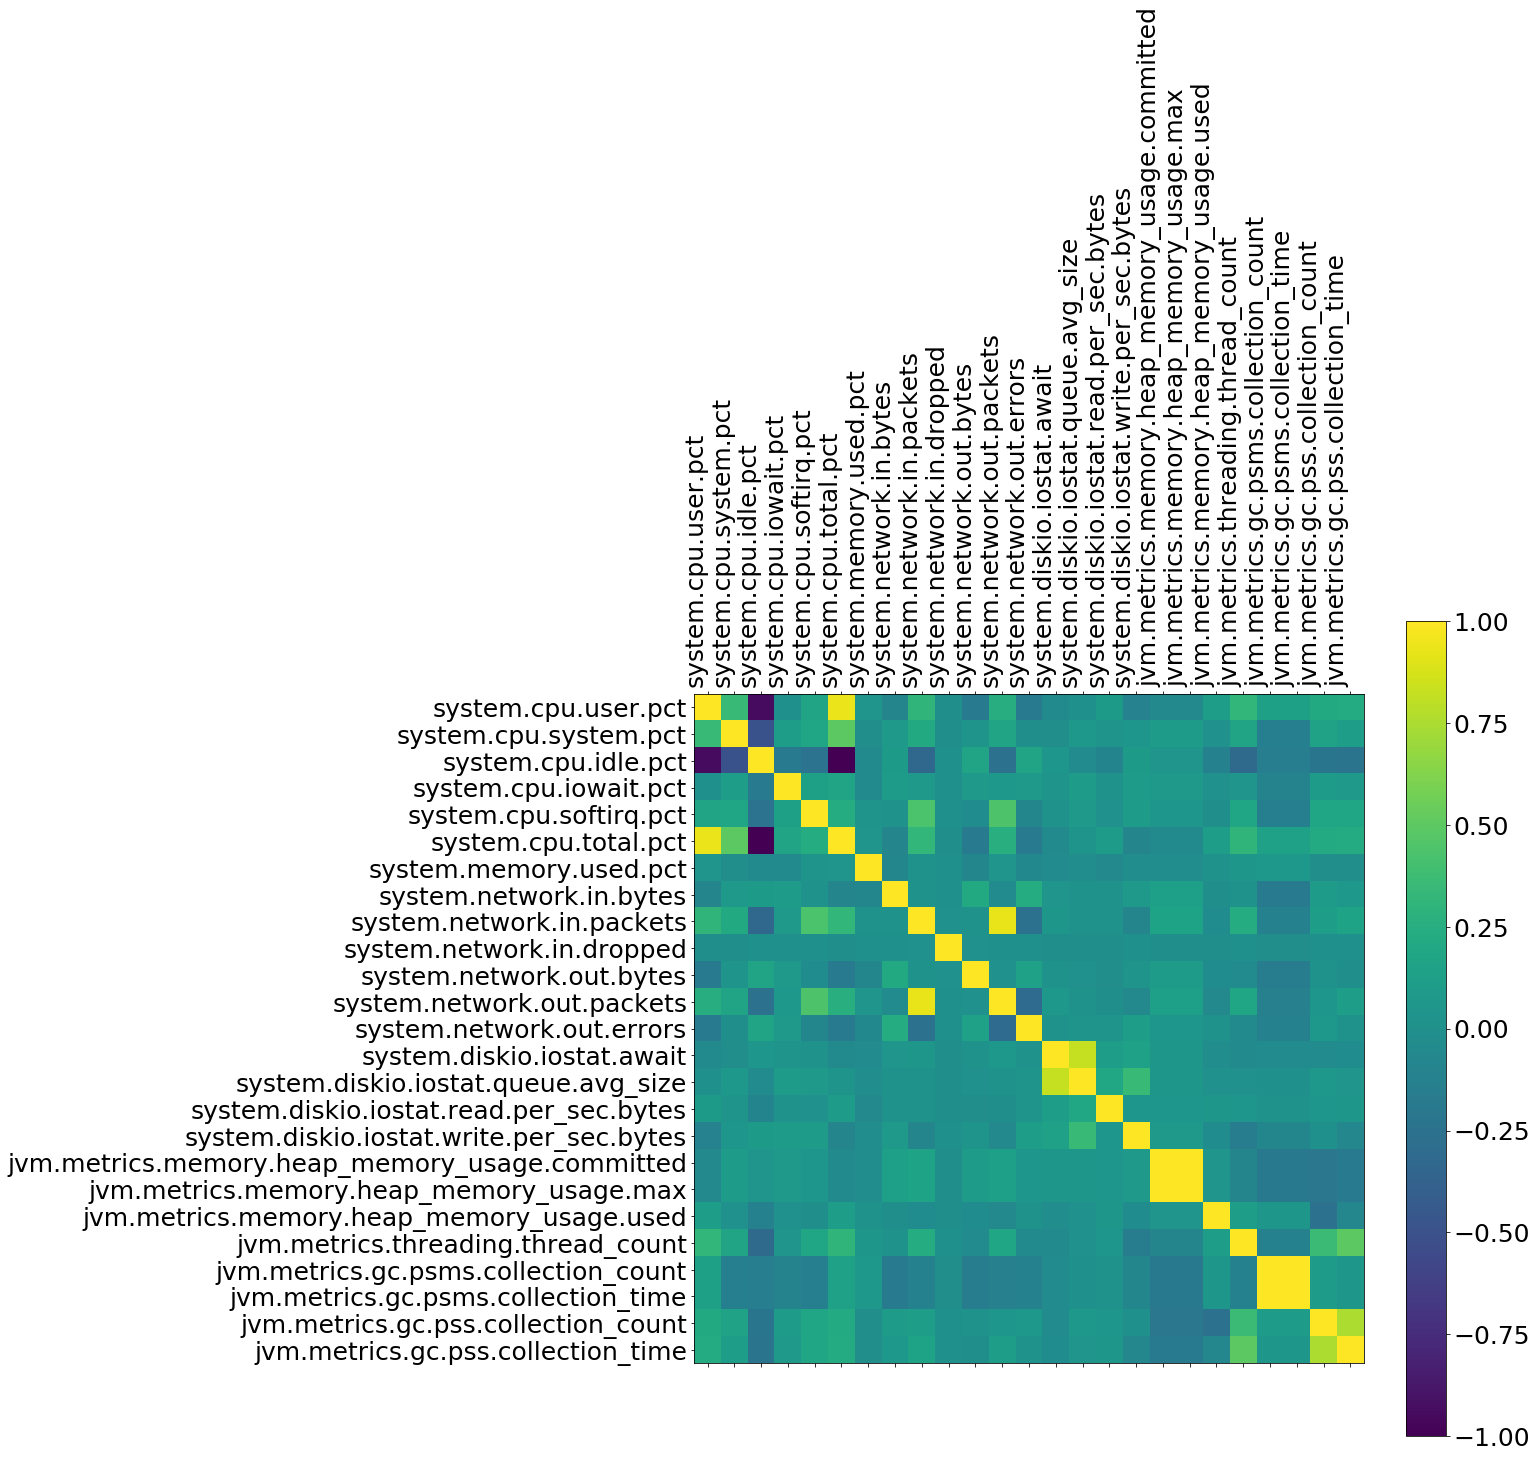

In [15]:
plot_corr(data)